<a href="https://colab.research.google.com/github/Rohit-RA-2020/Rohit-RA-2020.github.io/blob/master/digitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

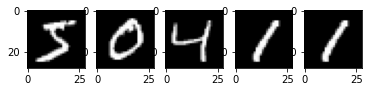

In [ ]:
plt.subplot(151)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(152)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(153)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(154)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(155)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

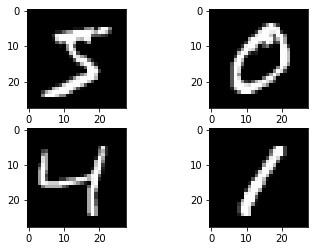

In [ ]:
# Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.utils import np_utils

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

model = Sequential()


model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/30
300/300 - 33s - loss: 0.3973 - accuracy: 0.8792 - val_loss: 0.0860 - val_accuracy: 0.9724
Epoch 2/30
300/300 - 33s - loss: 0.1059 - accuracy: 0.9672 - val_loss: 0.0597 - val_accuracy: 0.9804
Epoch 3/30
300/300 - 33s - loss: 0.0771 - accuracy: 0.9760 - val_loss: 0.0416 - val_accuracy: 0.9861
Epoch 4/30
300/300 - 33s - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0369 - val_accuracy: 0.9869
Epoch 5/30
300/300 - 33s - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.0409 - val_accuracy: 0.9859
Epoch 6/30
300/300 - 33s - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0407 - val_accuracy: 0.9865
Epoch 7/30
300/300 - 33s - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0282 - val_accuracy: 0.9909
Epoch 8/30
300/300 - 33s - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0262 - val_accuracy: 0.9913
Epoch 9/30
300/300 - 32s - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0268 - val_accuracy: 0.9920
Epoch 10/30
300/300 - 32s - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0271 - val_accura

In [ ]:
# Save whole model for download
model.save("model.h5")

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 92kB 5.1MB/s 
     |████████████████████████████████| 144.4MB 77kB/s 
     |████████████████████████████████| 256kB 40.7MB/s 
     |████████████████████████████████| 921kB 40.6MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=7e876f807bc41aaca41f00d5f20313092e4f9eb62141d4588e9b174befa82edc
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation:

In [ ]:
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'